In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [2]:
df=pd.read_csv("C:/Users/kasaa/Downloads/netflix_titles.csv")

In [3]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

seperating netfix movies

In [4]:
df_movies=df[df['type']=='Movie']

Analysing count of movies and tv shows

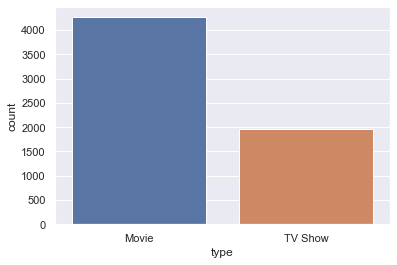

In [6]:
sns.set(style='darkgrid')
MTV_count=sns.countplot( x="type",data=df)

chances of movie release for the next data

In [7]:
df_shows=df[df['type']=='TV Show']

In [8]:
netfix_date=df_shows[['date_added']].dropna()


In [9]:
netfix_date

date_added
2     September 8, 2018
3     September 8, 2018
5     September 8, 2017
8     September 8, 2017
26    September 7, 2018
...                 ...
6218     April 10, 2019
6219      April 1, 2019
6220      April 1, 2016
6221      April 1, 2016
6222      April 1, 2014

[1959 rows x 1 columns]

In [10]:
netfix_date.isnull().sum()

date_added    0
dtype: int64

In [11]:
netfix_date['year']=netfix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netfix_date['month']=netfix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_array=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_array

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [12]:
date_group= netfix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_array].T

In [13]:
date_group

year       2008  2012  2013  2014  2015  2016  2017  2018  2019  2020
month                                                                
December    0.0   0.0   0.0   1.0   7.0  44.0  43.0  75.0  53.0   0.0
November    0.0   0.0   0.0   3.0   2.0  18.0  33.0  48.0  87.0   0.0
October     0.0   1.0   2.0   0.0   5.0  19.0  39.0  55.0  84.0   0.0
September   0.0   0.0   1.0   0.0   1.0  19.0  36.0  49.0  66.0   0.0
August      0.0   1.0   1.0   0.0   0.0  19.0  41.0  42.0  71.0   0.0
July        0.0   1.0   0.0   0.0   3.0  12.0  35.0  32.0  78.0   0.0
June        0.0   0.0   0.0   0.0   3.0   8.0  30.0  31.0  61.0   0.0
May         0.0   0.0   0.0   0.0   2.0   5.0  26.0  32.0  68.0   0.0
April       0.0   0.0   1.0   1.0   6.0   8.0  31.0  34.0  58.0   0.0
March       0.0   0.0   1.0   0.0   2.0   4.0  39.0  40.0  74.0   0.0
February    1.0   0.0   0.0   1.0   1.0   7.0  19.0  27.0  59.0   0.0
January     0.0   0.0   0.0   0.0   0.0  29.0  15.0  27.0  44.0  37.0

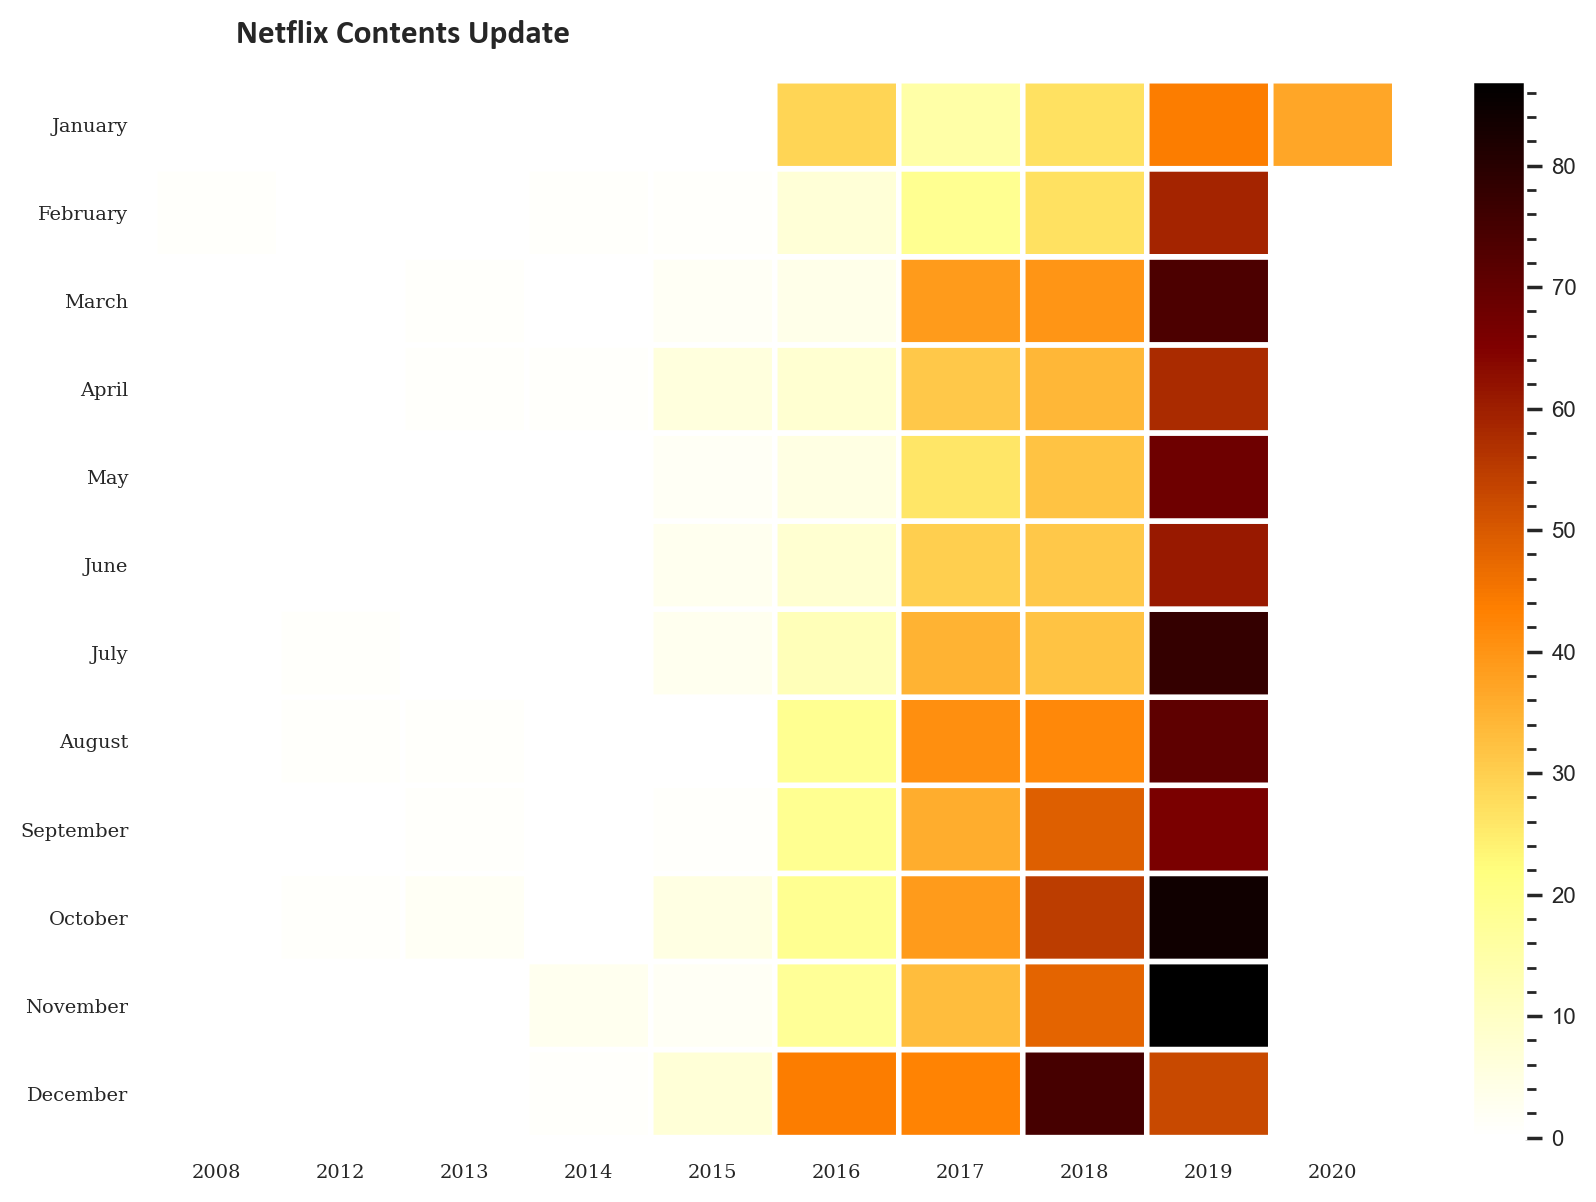

In [14]:
plt.figure(figsize=(10,7), dpi=200)
plt.pcolor(date_group, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(date_group.columns), 1), date_group.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(date_group.index), 1), date_group.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()



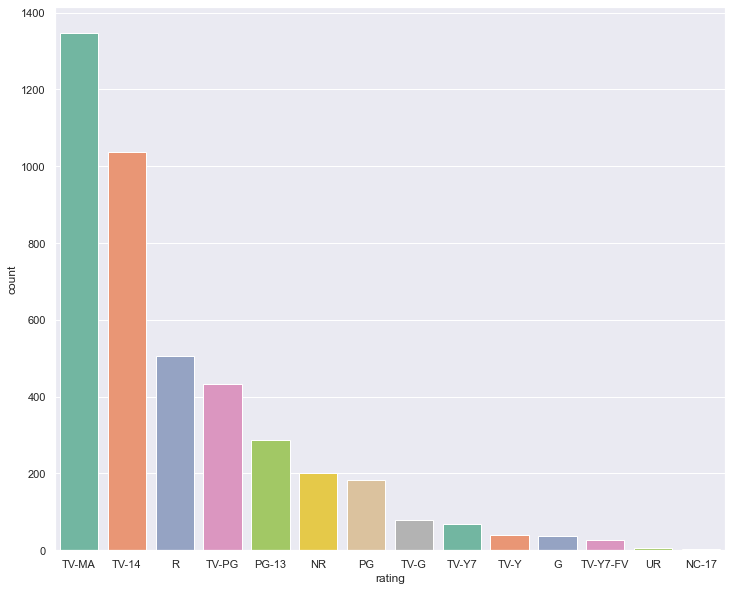

In [15]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
rating_count=sns.countplot(x="rating",data=df_movies,palette="Set2",order=df_movies['rating'].value_counts().index[0:15])

In [16]:
imdb_data=pd.read_csv('C:/Users/kasaa/Downloads/IMDb ratings.csv/IMDb ratings.csv')

In [17]:
imdb_data.head()

imdb_title_id  weighted_average_vote  total_votes  mean_vote  median_vote  \
0     tt0000009                    5.9          154        5.9          6.0   
1     tt0000574                    6.1          589        6.3          6.0   
2     tt0001892                    5.8          188        6.0          6.0   
3     tt0002101                    5.2          446        5.3          5.0   
4     tt0002130                    7.0         2237        6.9          7.0   

   votes_10  votes_9  votes_8  votes_7  votes_6  ...  females_30age_avg_vote  \
0        12        4       10       43       28  ...                     5.7   
1        57       18       58      137      139  ...                     6.2   
2         6        6       17       44       52  ...                     5.8   
3        15        8       16       62       98  ...                     5.5   
4       210      225      436      641      344  ...                     7.3   

   females_30age_votes  females_45age_avg_vote  females_45age_votes  \
0                 13.0                     4.5                  4.0   
1                 23.0                     6.6                 14.0   
2                  4.0                     6.8                  7.0   
3                 14.0                     6.1                 21.0   
4                 82.0                     7.4                 77.0   

   top1000_voters_rating  top1000_voters_votes  us_voters_rating  \
0                    5.7                  34.0               6.4   
1                    6.4                  66.0               6.0   
2                    5.4                  32.0               6.2   
3                    4.9                  57.0               5.5   
4                    6.9                 139.0               7.0   

   us_voters_votes  non_us_voters_rating  non_us_voters_votes  
0             51.0                   6.0                 70.0  
1             96.0                   6.2                331.0  
2             31.0                   5.9                123.0  
3            207.0                   4.7                105.0  
4            488.0                   7.0               1166.0  

[5 rows x 49 columns]

In [18]:
imdb_titles=pd.read_csv('C:/Users/kasaa/Downloads/IMDb movies.csv/IMDb movies.csv')
imdb_titles.head()

C:\Users\kasaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


imdb_title_id                        title               original_title  \
0     tt0000009                   Miss Jerry                   Miss Jerry   
1     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
2     tt0001892               Den sorte drøm               Den sorte drøm   
3     tt0002101                    Cleopatra                    Cleopatra   
4     tt0002130                    L'Inferno                    L'Inferno   

   year date_published                      genre  duration           country  \
0  1894     1894-10-09                    Romance        45               USA   
1  1906     1906-12-26    Biography, Crime, Drama        70         Australia   
2  1911     1911-08-19                      Drama        53  Germany, Denmark   
3  1912     1912-11-13             Drama, History       100               USA   
4  1911     1911-03-06  Adventure, Drama, Fantasy        68             Italy   

  language                             director  ...  \
0     None                      Alexander Black  ...   
1     None                         Charles Tait  ...   
2      NaN                            Urban Gad  ...   
3  English                   Charles L. Gaskill  ...   
4  Italian  Francesco Bertolini, Adolfo Padovan  ...   

                                              actors  \
0  Blanche Bayliss, William Courtenay, Chauncey D...   
1  Elizabeth Tait, John Tait, Norman Campbell, Be...   
2  Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3  Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4  Salvatore Papa, Arturo Pirovano, Giuseppe de L...   

                                         description avg_vote votes   budget  \
0  The adventures of a female reporter in the 1890s.      5.9   154      NaN   
1  True story of notorious Australian outlaw Ned ...      6.1   589   $ 2250   
2  Two men of high rank are both wooing the beaut...      5.8   188      NaN   
3  The fabled queen of Egypt's affair with Roman ...      5.2   446  $ 45000   
4  Loosely adapted from Dante's Divine Comedy and...      7.0  2237      NaN   

   usa_gross_income worlwide_gross_income metascore reviews_from_users  \
0               NaN                   NaN       NaN                1.0   
1               NaN                   NaN       NaN                7.0   
2               NaN                   NaN       NaN                5.0   
3               NaN                   NaN       NaN               25.0   
4               NaN                   NaN       NaN               31.0   

   reviews_from_critics  
0                   2.0  
1                   7.0  
2                   2.0  
3                   3.0  
4                  14.0  

[5 rows x 22 columns]

obtaining ratings and titles from imdb ratings datasets and joining them wrt titles

In [19]:
imdb_ratings=pd.read_csv('C:/Users/kasaa/Downloads/IMDb ratings.csv/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('C:/Users/kasaa/Downloads/IMDb movies.csv/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

C:\Users\kasaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(85852, 4)

In [20]:
ratings

Title Release Year  Rating  \
0                          Miss Jerry         1894     5.9   
1         The Story of the Kelly Gang         1906     6.1   
2                      Den sorte drøm         1911     5.8   
3                           Cleopatra         1912     5.2   
4                           L'Inferno         1911     7.0   
...                               ...          ...     ...   
85850                         Le lion         2020     5.3   
85851  De Beentjes van Sint-Hildegard         2020     7.7   
85852       Padmavyuhathile Abhimanyu         2019     7.9   
85853               Sokagin Çocuklari         2019     6.4   
85854      La vida sense la Sara Amat         2019     6.7   

                           Genre  
0                        Romance  
1        Biography, Crime, Drama  
2                          Drama  
3                 Drama, History  
4      Adventure, Drama, Fantasy  
...                          ...  
85850                     Comedy  
85851              Comedy, Drama  
85852                      Drama  
85853              Drama, Family  
85854                      Drama  

[85852 rows x 4 columns]

performing inner join on netflix dataset and ratings dataset

In [21]:
ratings.dropna()
join_data=ratings.merge(df,left_on='Title', right_on='title',how='inner')
join_data=join_data.sort_values(by='Rating',ascending=False)

In [22]:
import plotly.express as px
top_rated=join_data[0:10]
fig=px.sunburst(top_rated,path=['title','country'],values='Rating',color='Rating')
fig.show()

countries having highest rated content

In [23]:
country_count=join_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
top_countries=country_count[0:11]
top_countries

country
United States                      658
India                              608
United Kingdom                     106
Canada                              48
Philippines                         41
Spain                               40
South Korea                         31
Australia                           30
Indonesia                           29
France                              29
United Kingdom, United States       21

In [24]:
import plotly.express as px
data = dict(
    number=[658,608,106,48,41,40,31,30,29,29,21],
    country=["United States", "India", "United Kingdom", "Canada", "Philippines", "Spain", "South Korea", "Australia", "Indonesia", "France", "Mexico"])
fig = px.funnel(data, x='number', y='country')
fig.show()

performing yearwise analysis

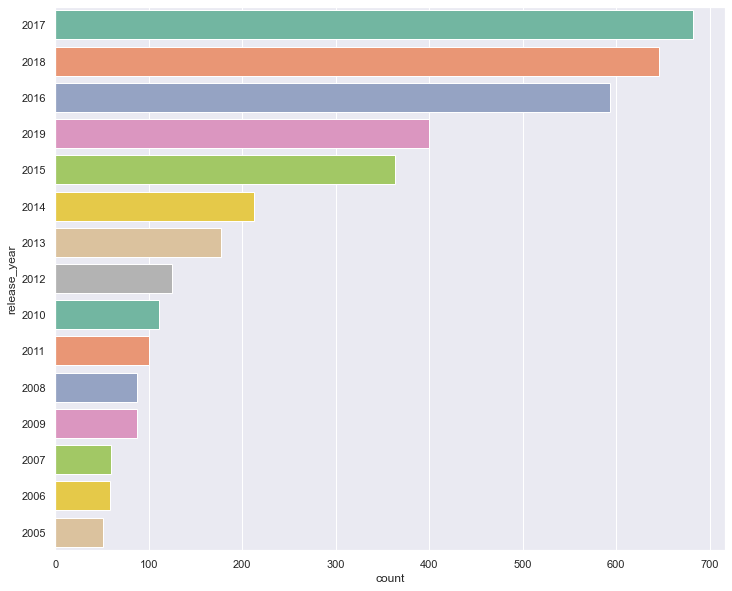

In [25]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
year=sns.countplot(y="release_year", data=df_movies,palette="Set2", order=df_movies['release_year'].value_counts().index[0:15])

In [26]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

Analyzing duration of movies

In [27]:
df_movies['duration']=df_movies['duration'].str.replace(' min','')
df_movies['duration']=df_movies['duration'].astype(str).astype(int)
df_movies['duration']

<ipython-input-27-90a108d5af95>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-90a108d5af95>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        90
1        94
4        99
6       110
7        60
       ... 
5577     70
5578    102
5579     88
5580    109
6231     60
Name: duration, Length: 4265, dtype: int32

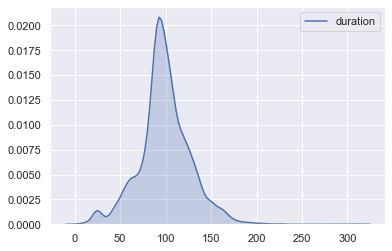

In [28]:
sns.set(style="darkgrid")
sns.kdeplot(data=df_movies['duration'],shade=True)

In [29]:



from collections import Counter
genres=list(df_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)
g
    

Counter({'Children&FamilyMovies': 378,
         'Comedies': 1113,
         'Stand-UpComedy': 281,
         'InternationalMovies': 1927,
         'Sci-Fi&Fantasy': 193,
         'Thrillers': 392,
         'Action&Adventure': 597,
         'Dramas': 1623,
         'CultMovies': 55,
         'IndependentMovies': 552,
         'RomanticMovies': 376,
         'Documentaries': 668,
         'HorrorMovies': 262,
         'Music&Musicals': 243,
         'AnimeFeatures': 45,
         'Faith&Spirituality': 47,
         'LGBTQMovies': 60,
         'Movies': 56,
         'ClassicMovies': 84,
         'SportsMovies': 157})

In [30]:
sorted(g.items(), key=lambda pair: pair[1], reverse=True)


[('InternationalMovies', 1927),
 ('Dramas', 1623),
 ('Comedies', 1113),
 ('Documentaries', 668),
 ('Action&Adventure', 597),
 ('IndependentMovies', 552),
 ('Thrillers', 392),
 ('Children&FamilyMovies', 378),
 ('RomanticMovies', 376),
 ('Stand-UpComedy', 281),
 ('HorrorMovies', 262),
 ('Music&Musicals', 243),
 ('Sci-Fi&Fantasy', 193),
 ('SportsMovies', 157),
 ('ClassicMovies', 84),
 ('LGBTQMovies', 60),
 ('Movies', 56),
 ('CultMovies', 55),
 ('Faith&Spirituality', 47),
 ('AnimeFeatures', 45)]

Generating wordcloud for genres
wordcloud: represents text data in form of visuals with colours showing importance of particular text

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

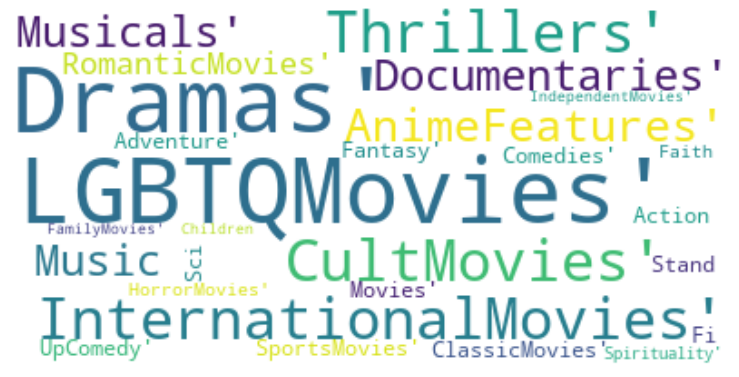

In [32]:
text = list(set(gen))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))
plt.figure(figsize=(13,13))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

lollipop plot of Genres vs their count 

In [33]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

In [34]:
g

{'InternationalMovies': 1927,
 'Dramas': 1623,
 'Comedies': 1113,
 'Documentaries': 668,
 'Action&Adventure': 597,
 'IndependentMovies': 552,
 'Thrillers': 392,
 'Children&FamilyMovies': 378,
 'RomanticMovies': 376,
 'Stand-UpComedy': 281,
 'HorrorMovies': 262,
 'Music&Musicals': 243,
 'Sci-Fi&Fantasy': 193,
 'SportsMovies': 157,
 'ClassicMovies': 84,
 'LGBTQMovies': 60,
 'Movies': 56,
 'CultMovies': 55,
 'Faith&Spirituality': 47,
 'AnimeFeatures': 45}

Text(0.5, 1.0, 'Genres')

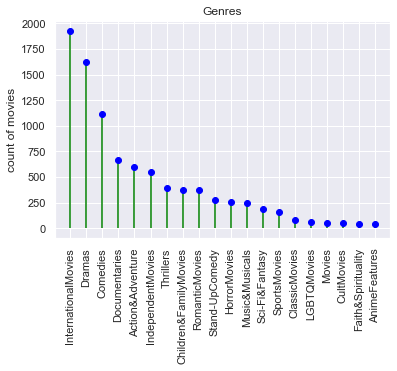

<Figure size 1440x1440 with 0 Axes>

In [35]:
fig, ax = plt.subplots()
fig=plt.figure(figsize=(20,20))
x=list(g.keys())
y=list(g.values())
ax.vlines(x,ymin=0,ymax=y, color="green")
ax.plot(x,y, "o",color="blue")
ax.set_xticklabels(x,rotation = 90)
ax.set_ylabel("count of movies")
ax.set_title("Genres")

Analyzing netflix series

In [36]:
df_shows.head()

show_id     type                             title director  \
2   70234439  TV Show                Transformers Prime      NaN   
3   80058654  TV Show  Transformers: Robots in Disguise      NaN   
5   80163890  TV Show                           Apaches      NaN   
8   80117902  TV Show                      Fire Chasers      NaN   
26  80244601  TV Show                   Castle of Stars      NaN   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                                 NaN  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...            NaN   

           date_added  release_year    rating  duration  \
2   September 8, 2018          2013  TV-Y7-FV  1 Season   
3   September 8, 2018          2016     TV-Y7  1 Season   
5   September 8, 2017          2016     TV-MA  1 Season   
8   September 8, 2017          2017     TV-MA  1 Season   
26  September 7, 2018          2015     TV-14  1 Season   

                                            listed_in  \
2                                            Kids' TV   
3                                            Kids' TV   
5   Crime TV Shows, International TV Shows, Spanis...   
8                     Docuseries, Science & Nature TV   
26  International TV Shows, Romantic TV Shows, TV ...   

                                          description  
2   With the help of three human allies, the Autob...  
3   When a prison ship crash unleashes hundreds of...  
5   A young journalist is forced into a life of cr...  
8   As California's 2016 fire season rages, brave ...  
26  As four couples with different lifestyles go t...

In [37]:
df_shows['country'].head(50)

2                               United States
3                               United States
5                                       Spain
8                               United States
26                                        NaN
28                                        NaN
34                                        NaN
39                                     France
54                              United States
61                              United States
63                              United States
64                              United States
66                              United States
67                              United States
68                              United States
69                              United States
70                              United States
72                             United Kingdom
74                                        NaN
80                                        NaN
83                             United Kingdom
84                                

In [38]:
countries1={}
df_shows['country']=df_shows['country'].fillna('Unknown')
cou1=list(df_shows['country'])
for i in cou1:
    i=list(i.split(','))
    if len(i) == 1:
        print(countries1)
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

<ipython-input-38-661ad346ad0b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{}
{'United States': 1}
{'United States': 1}
{'United States': 1, 'Spain': 1}
{'United States': 1, 'Spain': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1, 'United Kingdom': 1}
{'United States': 1, 'Spain': 1, 'Unknown': 1, 'France': 1, 'United

In [39]:
len(countries1)

89

In [40]:
countries1

{'United States': 1,
 'Spain': 1,
 'Unknown': 1,
 'France': 1,
 'United Kingdom': 1,
 'India': 2,
 'Mexico': 2,
 'South Korea': 1,
 'Japan': 1,
 ' Canada': 31,
 ' United States': 66,
 ' France': 20,
 ' Germany': 14,
 ' Spain': 6,
 'Thailand': 1,
 'Canada': 1,
 ' South Korea': 7,
 'Lebanon': 1,
 'Poland': 1,
 'China': 1,
 'Taiwan': 1,
 'Australia': 1,
 'Russia': 1,
 'Norway': 3,
 'Germany': 1,
 ' Italy': 5,
 'Switzerland': 1,
 'Czech Republic': 1,
 ' Czech Republic': 4,
 'Brazil': 1,
 'Argentina': 1,
 ' West Germany': 2,
 'Turkey': 1,
 'Malaysia': 1,
 ' United Kingdom': 22,
 ' Russia': 2,
 ' Japan': 24,
 'Colombia': 1,
 'Iceland': 1,
 ' Belgium': 2,
 ' Sweden': 3,
 'Singapore': 1,
 ' Mexico': 12,
 'Denmark': 2,
 'Belgium': 1,
 ' Netherlands': 3,
 ' China': 3,
 ' Hong Kong': 2,
 'Italy': 2,
 ' Ireland': 4,
 'Chile': 1,
 'Egypt': 1,
 'Ukraine': 1,
 ' Jordan': 1,
 'Sweden': 1,
 'New Zealand': 1,
 'Israel': 1,
 ' Greece': 3,
 'United Arab Emirates': 1,
 ' South Africa': 5,
 ' Australia': 6,

In [41]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no

In [42]:
countries_fin1={k: v for k,v in sorted(countries_fin1.items(),key=lambda item: item[1], reverse= True)}

Text(0, 0.5, 'Arraival day in minutes')

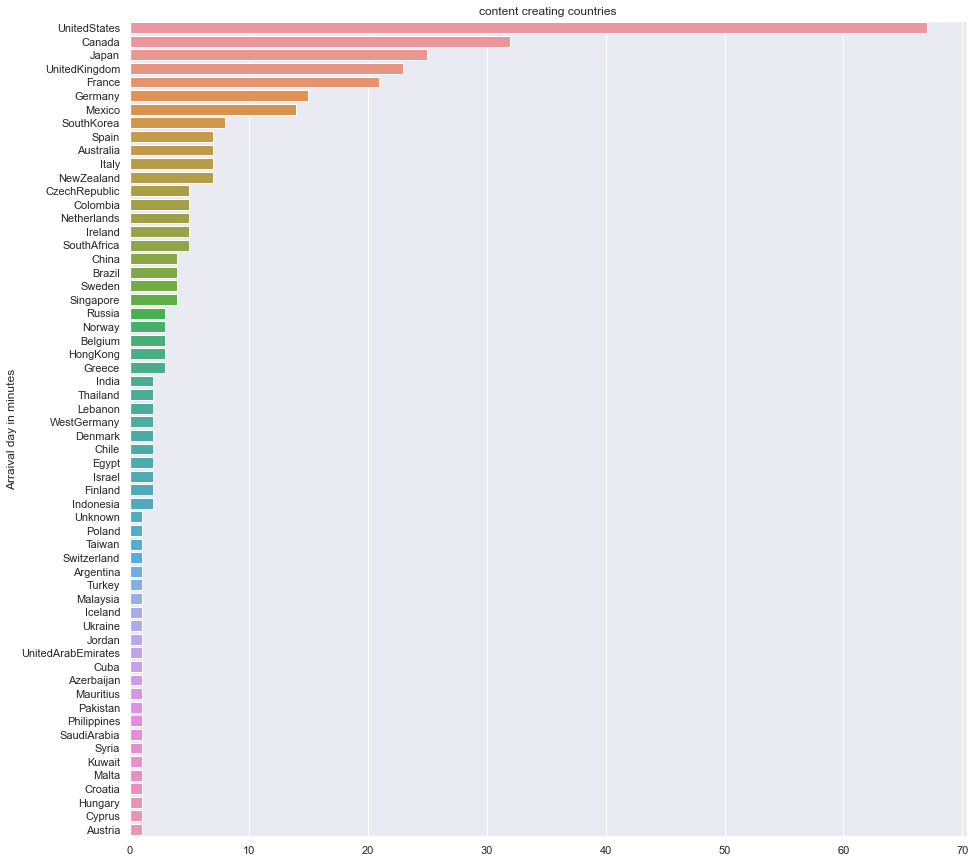

In [43]:
plt.figure(figsize=(15,15))
plt.title("content creating countries")
sns.barplot(y=list(countries_fin1.keys()),x=list(countries_fin1.values()))
plt.ylabel("Arraival day in minutes")

In [44]:
df_shows.head()

show_id     type                             title director  \
2   70234439  TV Show                Transformers Prime      NaN   
3   80058654  TV Show  Transformers: Robots in Disguise      NaN   
5   80163890  TV Show                           Apaches      NaN   
8   80117902  TV Show                      Fire Chasers      NaN   
26  80244601  TV Show                   Castle of Stars      NaN   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                                 NaN  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...        Unknown   

           date_added  release_year    rating  duration  \
2   September 8, 2018          2013  TV-Y7-FV  1 Season   
3   September 8, 2018          2016     TV-Y7  1 Season   
5   September 8, 2017          2016     TV-MA  1 Season   
8   September 8, 2017          2017     TV-MA  1 Season   
26  September 7, 2018          2015     TV-14  1 Season   

                                            listed_in  \
2                                            Kids' TV   
3                                            Kids' TV   
5   Crime TV Shows, International TV Shows, Spanis...   
8                     Docuseries, Science & Nature TV   
26  International TV Shows, Romantic TV Shows, TV ...   

                                          description  
2   With the help of three human allies, the Autob...  
3   When a prison ship crash unleashes hundreds of...  
5   A young journalist is forced into a life of cr...  
8   As California's 2016 fire season rages, brave ...  
26  As four couples with different lifestyles go t...

In [45]:
features=['title','duration']
durations=df_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace('Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')


<ipython-input-45-f2c986e19a4c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-f2c986e19a4c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

<ipython-input-46-ad93769c4198>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons',ascending=False)

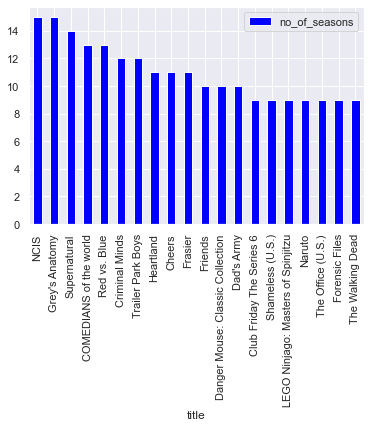

In [48]:
top20=top[0:20]
top20.plot(kind='bar', x='title', y='no_of_seasons', color='blue')

lowest number of seasons

In [49]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=['Title','No of seasons']),
                              cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

Word cloud for genres

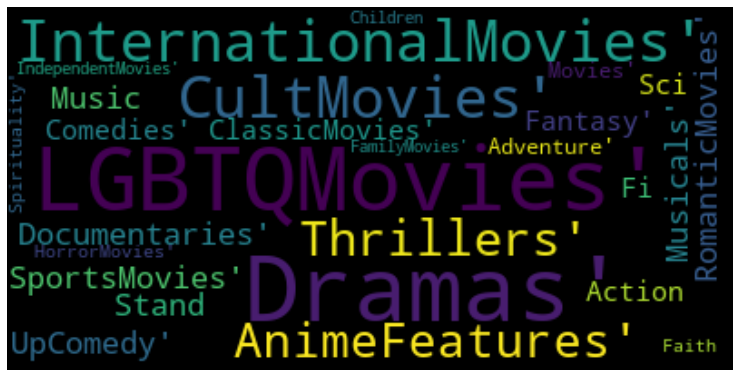

In [50]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
text=list(set(gen))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(str(text))
plt.figure(figsize=(13,13))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


In [51]:
us_series_data=df_shows[df_shows['country']=='United States']

In [52]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [53]:
fig=go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                             cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                   ])
fig.show()

In [54]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [55]:
fig=go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='Yellow'),
                             cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                   ])
fig.show()

###### Content in France

In [56]:
netflix_fr=df[df['country']=='France']
nanef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nanef, path=['country','director'],color='director',hover_data=['director','title'],color_continuous_scale='purple')
fig.show()

In [57]:
netflix_us=df[df['country']=='United States']
naneus=netflix_us.dropna()
import plotly.express as px
fig = px.treemap(naneus, path=['country','director'],color='director',hover_data=['director','title'],color_continuous_scale='blue')
fig.show()

In [58]:
newest_fr_series=netflix_fr.sort_values(by='release_year',ascending=False)[0:20]

In [59]:
newest_fr_series

show_id     type                                         title  \
3472  81074060  TV Show                                    Until Dawn   
39    80178151  TV Show                                       The Spy   
1014  81079723    Movie                                Paradise Beach   
1791  81012340    Movie                                   Shéhérazade   
2516  81010818  TV Show                               Family Business   
2587  81027187    Movie                               The Wolf's Call   
1309  81096745    Movie  Fadily Camara : La plus drôle de tes copines   
3858  81027190    Movie                                   Paris Is Us   
1192  80222157  TV Show                    Who Killed Little Gregory?   
1152  80241539  TV Show                                        Mortel   
1135  80198859    Movie                                       Brother   
1092  81018979  TV Show                                   Mythomaniac   
1945  81024044    Movie                                        Lady J   
4339  80213020  TV Show                        The Bonfire of Destiny   
1079  81120982    Movie                                I Lost My Body   
4440  80989919  TV Show                             Twice Upon A Time   
534   81061828  TV Show                             Nailed It! France   
272   80217779  TV Show                                      Marianne   
732   81034012    Movie                                   Street Flow   
5692  80190086  TV Show                              The Hook Up Plan   

                  director                                               cast  \
3472                   NaN  Ahmed Sylla, Alban Ivanov, Ornella Fleury, Nat...   
39                     NaN  Sacha Baron Cohen, Noah Emmerich, Hadar Ratzon...   
1014      Xavier Durringer  Sami Bouajila, Tewfik Jallab, Mélanie Doutey, ...   
1791   Jean-Bernard Marlin  Dylan Robert, Kenza Fortas, Idir Azougli, Lisa...   
2516                   NaN  Jonathan Cohen, Gérard Darmon, Julia Piaton, L...   
2587        Antonin Baudry  François Civil, Omar Sy, Mathieu Kassovitz, Re...   
1309       Gautier & Leduc                                      Fadily Camara   
3858      Elisabeth Vogler  Noémie Schmidt, Grégoire Isvarine, Marie Motte...   
1192                   NaN                                                NaN   
1152                   NaN  Carl Malapa, Nemo Schiffman, Manon Bresch, Cor...   
1135        Julien Abraham  MHD, Darren Muselet, Aïssa Maïga, Jalil Lesper...   
1092                   NaN  Marina Hands, Mathieu Demy, Marie Drion, Jérém...   
1945       Emmanuel Mouret  Cécile De France, Edouard Baer, Alice Isaaz, N...   
4339                   NaN  Audrey Fleurot, Julie de Bona, Camille Lou, Gi...   
1079         Jérémy Clapin  Hakim Faris, Victoire Du Bois, Patrick d'Assum...   
4440                   NaN                        Gaspard Ulliel, Freya Mavor   
534                    NaN                               Artus, Noémie Honiat   
272                    NaN  Victoire Du Bois, Lucie Boujenah, Tiphaine Dav...   
732   Leïla Sy, Kery James  Kery James, Jammeh Diangana, Chloé Jouannet, B...   
5692                   NaN  Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...   

     country          date_added  release_year rating   duration  \
3472  France    January 10, 2020          2020  TV-MA   1 Season   
39    France   September 6, 2019          2019  TV-MA   1 Season   
1014  France    November 8, 2019          2019  TV-MA     94 min   
1791  France        May 11, 2019          2019  TV-MA    111 min   
2516  France       June 28, 2019          2019  TV-MA   1 Season   
2587  France       June 20, 2019          2019  TV-14    116 min   
1309  France   November 14, 2019          2019  TV-MA     54 min   
3858  France   February 22, 2019          2019  TV-MA     84 min   
1192  France   November 20, 2019          2019  TV-MA   1 Season   
1152  France   November 21, 2019          2019  TV-MA   1 Season   
1135  France   November

In [60]:
fig=go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='Yellow'),
                             cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']],fill_color='lavender'))
                   ])
fig.show()


Top Duration

In [61]:
topdirs=pd.value_counts(df['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values, text=topdirs.values,marker_color='green')])
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.show()

Recomendation System (Content Based)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tfidf = TfidfVectorizer(stop_words='english')
df['description'] =df['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(6234, 16151)

compute cosine similarity of Tfidf vectorized words

In [64]:
from sklearn.metrics.pairwise import linear_kernel

In [65]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [66]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [67]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [68]:
def get_recomendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse= True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [69]:
get_recomendations('Peaky Blinders')


296                     Our Godfather
4491                              Don
2015                         The Fear
4852    Jonathan Strange & Mr Norrell
1231                       The Prison
3737                Power Rangers Zeo
5986                       The Tudors
1753      Once Upon a Time in Mumbaai
5494     The Legend of Michael Mishra
1142                  Shelby American
Name: title, dtype: object

In [70]:
get_recomendations('The Spy')

5968                             Mossad 101
4639                           The Departed
3804                  Beauty and the Bestie
3503                          Donnie Brasco
3259                      Inside the Mossad
1038                   Undercover Brother 2
99                            Bard of Blood
3084                        The Book of Eli
5216              The Spy Who Fell to Earth
3898    Spy Kids: All the Time in the World
Name: title, dtype: object

content based filtering on multiple metrics

content based filtering on factors
Title,
Cast,
Director,
Listed in,
Plot

In [71]:
filledna1=df.fillna('')
filledna1.head(2)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   

                   director  \
0  Richard Finn, Tim Maltby   
1                             

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   

  rating duration                           listed_in  \
0  TV-PG   90 min  Children & Family Movies, Comedies   
1  TV-MA   94 min                     Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...

cleaning data by making all words lowercase

In [72]:
def clean_data(x):
    return str.lower(x.replace(" ",""))

identifying features on which the model is to be filtered

In [137]:
features=['title','director','cast','listed_in','description']
filledna1=filledna1[features]

In [138]:
for feature in features:
    filledna1[feature] = filledna1[feature].apply(clean_data)
    

<ipython-input-138-f4c31feb857a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
filledna1.head(2)

title               director  \
0  normofthenorth:kingsizedadventure  richardfinn,timmaltby   
1            jandino:whateverittakes                          

                                                cast  \
0  alanmarriott,andrewtoth,briandobson,colehoward...   
1                                    jandinoasporaat   

                        listed_in  \
0  children&familymovies,comedies   
1                  stand-upcomedy   

                                         description  
0  beforeplanninganawesomeweddingforhisgrandfathe...  
1  jandinoasporaatriffsonthechallengesofraisingki...

creating soup or bag of words for all rows

In [140]:
def create_soup(x):
    return x['title']+ ' ' + x['director']+ ' ' + x['cast']+ ' ' + x['listed_in']+ ' ' + x['description']

In [141]:
filledna1['soup'] = filledna1.apply(create_soup, axis=1)

<ipython-input-141-a808066ace31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
filledna1['soup']

0       normofthenorth:kingsizedadventure richardfinn,...
1       jandino:whateverittakes  jandinoasporaat stand...
2       transformersprime  petercullen,sumaleemontano,...
3       transformers:robotsindisguise  willfriedle,dar...
4       #realityhigh fernandolebrija nestacooper,katew...
                              ...                        
6229    redvs.blue  burnieburns,jasonsaldaña,gustavoso...
6230    maron  marcmaron,juddhirsch,joshbrener,norazeh...
6231    littlebabybum:nurseryrhymefriends   movies nur...
6232    ayoungdoctor'snotebookandotherstories  danielr...
6233    friends  jenniferaniston,courteneycox,lisakudr...
Name: soup, Length: 6234, dtype: object

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

In [144]:
from sklearn.metrics.pairwise import cosine_similarity


In [145]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna1['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [146]:
count_matrix

<6234x56072 sparse matrix of type '<class 'numpy.int64'>'
	with 94275 stored elements in Compressed Sparse Row format>

In [147]:
filledna1=filledna1.reset_index()
indices = pd.Series(filledna1.index, index=filledna1['title'])

In [148]:
def get_recomendations_multiple(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]




    

In [149]:
get_recomendations_multiple('PK', cosine_sim2)


5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
2196                             Haapus
691                               Sanju
4110                   Taare Zameen Par
1449                    Chance Pe Dance
2194                    Chal Dhar Pakad
1746    EMI: Liya Hai To Chukana Padega
4920                   Khosla Ka Ghosla
Name: title, dtype: object

In [150]:

get_recomendations_multiple('Peaky Blinders', cosine_sim2)


3465                                   Giri / Haji
6050                   The Frankenstein Chronicles
2018                         The Murder Detectives
5529                                        Loaded
550                                      Bodyguard
2505                                 Kiss Me First
5859                                  Happy Valley
233     How to Live Mortgage Free with Sarah Beeny
522                          Terrorism Close Calls
1605                                Killer Ratings
Name: title, dtype: object

In [151]:
get_recomendations_multiple('Giri / Haji', cosine_sim2)


6050                   The Frankenstein Chronicles
2505                                 Kiss Me First
233     How to Live Mortgage Free with Sarah Beeny
522                          Terrorism Close Calls
1605                                Killer Ratings
4793                      Inside the Criminal Mind
4813                                 I AM A KILLER
5648                                Peaky Blinders
6177                                    Hinterland
1248                                      Paranoid
Name: title, dtype: object

In [152]:
df.describe()

show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


how many neflix shows/movies are made from books

In [154]:
books=pd.read_csv('C:/Users/kasaa/Downloads/books.csv/books.csv')

In [155]:
books.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   
3                     To Kill a Mockingbird  ...       3198671   
4                          The Great Gatsby  ...       2683664   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            3340896                    72586      60427     117415   
4            2773745                    51992      86236     197621   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     446835    1001952    1714267   
4     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...  

[5 rows x 23 columns]

In [156]:
books['original_title']=books['original_title'].str.lower()
x=df
x['title']=x['title'].str.lower()
t=x.merge(books, left_on='title',right_on='original_title', how="inner")

In [157]:
t.shape

(248, 35)

In [158]:
import plotly.graph_objects as go
labels = ['shows from books','shows not from books']
values = [248,6234]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [159]:
df['cast']

0       Alan Marriott, Andrew Toth, Brian Dobson, Cole...
1                                        Jandino Asporaat
2       Peter Cullen, Sumalee Montano, Frank Welker, J...
3       Will Friedle, Darren Criss, Constance Zimmer, ...
4       Nesta Cooper, Kate Walsh, John Michael Higgins...
                              ...                        
6229    Burnie Burns, Jason Saldaña, Gustavo Sorola, G...
6230    Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...
6231                                                  NaN
6232    Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...
6233    Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
Name: cast, Length: 6234, dtype: object

In [160]:
df=pd.read_csv("C:/Users/kasaa/Downloads/netflix_titles.csv/netflix_titles.csv")

In [161]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [162]:
filledna1=filledna1.reset_index()
indices1 = pd.Series(filledna1.index, index=filledna1['cast'])

In [165]:
def get_recomendations_cast(cast, cosine_sim=cosine_sim):
    cast=cast.replace(' ','').lower()
    
    idx1 = indices1[cast]
    sim_scores = list(enumerate(cosine_sim[idx1]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_cast = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_cast]


In [166]:
get_recomendations_cast('Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson',cosine_sim2)

1780    Norm of the North: Keys to the Kingdom
4663       Little Singham aur Kaal ka Mahajaal
5318                  Little Singham in London
621            Little Singham: Kaal Ki Tabaahi
3537            Luccas Neto in: Children's Day
406                                 Figaro Pho
2787                 Motu Patlu: King of Kings
4715                             Tellur Aliens
3308                                 Planet 51
1508                   Pettersson and Findus 2
Name: title, dtype: object

In [168]:
get_recomendations_multiple('Norm of the North: King Sized Adventure', cosine_sim2)



1780    Norm of the North: Keys to the Kingdom
4663       Little Singham aur Kaal ka Mahajaal
5318                  Little Singham in London
621            Little Singham: Kaal Ki Tabaahi
3537            Luccas Neto in: Children's Day
406                                 Figaro Pho
2787                 Motu Patlu: King of Kings
4715                             Tellur Aliens
3308                                 Planet 51
1508                   Pettersson and Findus 2
Name: title, dtype: object

In [211]:
df_split=df['cast'].str.replace(',',"").str.split(' ')


In [212]:
df_split

0       [Alan, Marriott, Andrew, Toth, Brian, Dobson, ...
1                                     [Jandino, Asporaat]
2       [Peter, Cullen, Sumalee, Montano, Frank, Welke...
3       [Will, Friedle, Darren, Criss, Constance, Zimm...
4       [Nesta, Cooper, Kate, Walsh, John, Michael, Hi...
                              ...                        
6229    [Burnie, Burns, Jason, Saldaña, Gustavo, Sorol...
6230    [Marc, Maron, Judd, Hirsch, Josh, Brener, Nora...
6231                                                  NaN
6232    [Daniel, Radcliffe, Jon, Hamm, Adam, Godley, C...
6233    [Jennifer, Aniston, Courteney, Cox, Lisa, Kudr...
Name: cast, Length: 6234, dtype: object

In [213]:
df['cast']

0       Alan Marriott, Andrew Toth, Brian Dobson, Cole...
1                                        Jandino Asporaat
2       Peter Cullen, Sumalee Montano, Frank Welker, J...
3       Will Friedle, Darren Criss, Constance Zimmer, ...
4       Nesta Cooper, Kate Walsh, John Michael Higgins...
                              ...                        
6229    Burnie Burns, Jason Saldaña, Gustavo Sorola, G...
6230    Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...
6231                                                  NaN
6232    Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...
6233    Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
Name: cast, Length: 6234, dtype: object

In [214]:
df['split_cast']=df_split 

In [199]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  \
0  Before planning an awesome wedding for his gra...   
1  Jandino Asporaat riffs on the challenges of ra...   
2  With the help of three human allies, the Autob...   
3  When a prison ship crash unleashes hundreds of...   
4  When nerdy high schooler Dani finally attracts...   

                                          split_cast  
0  [Alan, Marriott, Andrew, Toth, Brian, Dobson, ...  
1                                [Jandino, Asporaat]  
2  [Peter, Cullen, Sumalee, Montano, Frank, Welke...  
3  [Will, Friedle, Darren, Criss, Constance, Zimm...  
4  [Nesta, Cooper, Kate, Walsh, John, Michael, Hi...

In [240]:
strings=df['split_cast'][0]
' '.join(strings)


'Alan Marriott Andrew Toth Brian Dobson Cole Howard Jennifer Cameron Jonathan Holmes Lee Tockar Lisa Durupt Maya Kay Michael Dobson'

In [242]:
df["split_cast"]= df["split_cast"].str.join(" ") 


In [304]:
df['cast'][0]

'Alan Marriott Andrew Toth Brian Dobson Cole Howard Jennifer Cameron Jonathan Holmes Lee Tockar Lisa Durupt Maya Kay Michael Dobson'

In [286]:
df['cast']=df['split_cast']

In [287]:
fillednac=df.fillna('')

In [308]:
fillednac.head()

index                                    title                  director  \
0      0  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1      1               Jandino: Whatever it Takes                             
2      2                       Transformers Prime                             
3      3         Transformers: Robots in Disguise                             
4      4                             #realityhigh          Fernando Lebrija   

                                                cast  \
0  Alan Marriott Andrew Toth Brian Dobson Cole Ho...   
1                                   Jandino Asporaat   
2  Peter Cullen Sumalee Montano Frank Welker Jeff...   
3  Will Friedle Darren Criss Constance Zimmer Kha...   
4  Nesta Cooper Kate Walsh John Michael Higgins K...   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description  \
0  Before planning an awesome wedding for his gra...   
1  Jandino Asporaat riffs on the challenges of ra...   
2  With the help of three human allies, the Autob...   
3  When a prison ship crash unleashes hundreds of...   
4  When nerdy high schooler Dani finally attracts...   

                                                soup  
0  Norm of the North: King Sized Adventure Richar...  
1  Jandino: Whatever it Takes  Jandino Asporaat S...  
2  Transformers Prime  Peter Cullen Sumalee Monta...  
3  Transformers: Robots in Disguise  Will Friedle...  
4  #realityhigh Fernando Lebrija Nesta Cooper Kat...

In [288]:
def clean_data(x):
    return str.lower(x.replace(" ",""))

In [289]:
features=['title','director','cast','listed_in','description']
fillednac=fillednac[features]

In [290]:
def create_soup(x):
    return x['title']+ ' ' + x['director']+ ' ' + x['cast']+ ' ' + x['listed_in']+ ' ' + x['description']

In [291]:
fillednac['soup'] = fillednac.apply(create_soup, axis=1)

In [292]:
fillednac['soup']

0       Norm of the North: King Sized Adventure Richar...
1       Jandino: Whatever it Takes  Jandino Asporaat S...
2       Transformers Prime  Peter Cullen Sumalee Monta...
3       Transformers: Robots in Disguise  Will Friedle...
4       #realityhigh Fernando Lebrija Nesta Cooper Kat...
                              ...                        
6229    Red vs. Blue  Burnie Burns Jason Saldaña Gusta...
6230    Maron  Marc Maron Judd Hirsch Josh Brener Nora...
6231    Little Baby Bum: Nursery Rhyme Friends   Movie...
6232    A Young Doctor's Notebook and Other Stories  D...
6233    Friends  Jennifer Aniston Courteney Cox Lisa K...
Name: soup, Length: 6234, dtype: object

In [293]:
from sklearn.feature_extraction.text import CountVectorizer

In [294]:
from sklearn.metrics.pairwise import cosine_similarity


In [295]:
count_cast = CountVectorizer(stop_words='english')
count_matrix_cast = count_cast.fit_transform(fillednac['soup'])
cosine_sim_cast = cosine_similarity(count_matrix_cast, count_matrix_cast)

In [296]:
count_matrix.shape

(6234, 56072)

In [297]:
fillednac=fillednac.reset_index()
indices_cast = pd.Series(fillednac.index, index=fillednac['cast'])

In [301]:
def get_recomendations_cast(cast, cosine_sim=cosine_sim):
    cast=cast.replace(' ','').lower()
    
    idx1 = indices1[cast]
    sim_scores = list(enumerate(cosine_sim[idx1]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_cast = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_cast]

In [307]:
get_recomendations_cast('Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson',cosine_sim_cast)

1780    Norm of the North: Keys to the Kingdom
1379                                Holly Star
2787                 Motu Patlu: King of Kings
1406                                Santa Girl
930         Barbie: The Princess & the Popstar
4715                             Tellur Aliens
926                Barbie Star Light Adventure
3286                Mune: Guardian of the Moon
3564                             Stuart Little
1800          Chhota Bheem Ka Romani Adventure
Name: title, dtype: object